In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures 

In [35]:
data=pd.read_csv('sunspot_data.csv')
data=data.drop(columns=['Unnamed: 0','Date In Fraction Of Year'])
data.head(2)

,Year,Month,Day,Number of Sunspots,Standard Deviation,Observations,Indicator
0,1818,1,1,-1,-1.0,0,1
1,1818,1,2,-1,-1.0,0,1


In [38]:
data.isnull().sum()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73718 entries, 0 to 73717
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                73718 non-null  int64  
 1   Month               73718 non-null  int64  
 2   Day                 73718 non-null  int64  
 3   Number of Sunspots  73718 non-null  int64  
 4   Standard Deviation  73718 non-null  float64
 5   Observations        73718 non-null  int64  
 6   Indicator           73718 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 3.9 MB
None


In [39]:
data=data.rename(columns={'Standard Deviation':'Standard_Deviation'})
data.corr()

,Year,Month,Day,Number of Sunspots,Standard_Deviation,Observations,Indicator
Year,1.000000,-0.002064,-0.000006,0.128837,-0.149085,0.638723,-0.070575
Month,-0.002064,1.000000,0.010570,0.002993,0.002403,-0.005204,-0.023447
Day,-0.000006,0.010570,1.000000,-0.002208,-0.005698,-0.000928,-0.000691
Number of Sunspots,0.128837,0.002993,-0.002208,1.000000,0.837165,-0.028468,0.041408
Standard_Deviation,-0.149085,0.002403,-0.005698,0.837165,1.000000,-0.147914,0.058801
Observations,0.638723,-0.005204,-0.000928,-0.028468,-0.147914,1.000000,-0.148822
Indicator,-0.070575,-0.023447,-0.000691,0.041408,0.058801,-0.148822,1.000000


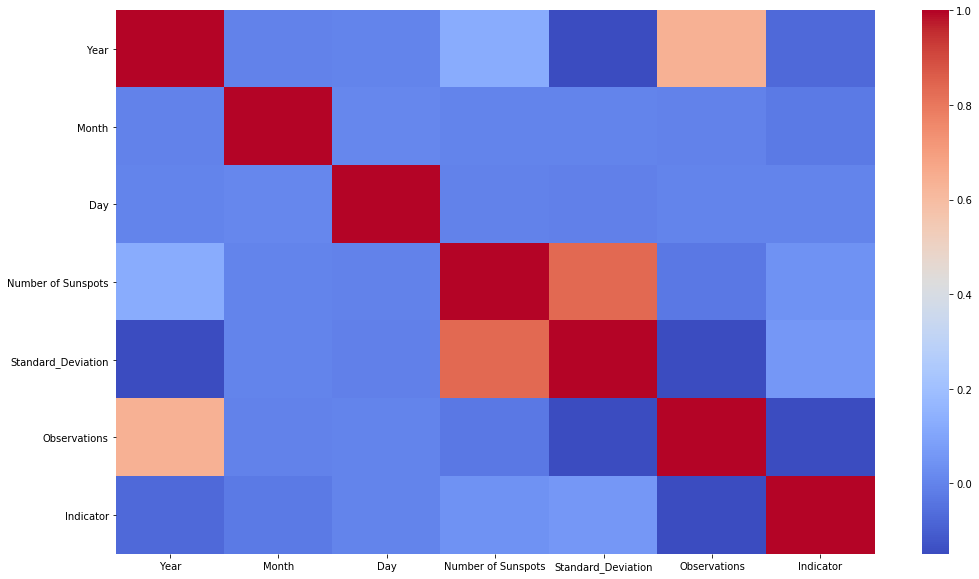

In [40]:
plt.figure(figsize=(17,10))
sns.heatmap(data.corr(), cmap='coolwarm')

In [54]:
X = data[['Year', 'Month', 'Day', 'Standard_Deviation' ,'Observations']]
y = data[['Number of Sunspots']]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (58974, 5)
X_test dimension=  (14744, 5)
y_train dimension=  (58974, 1)
y_train dimension=  (14744, 1)


In [56]:
def polynomial_plot(feature, label):
  # Create 1D array. We can use 'squeeze' function to reduce the 2D array to 1D array
  x_coordinates = feature
  y_coordinates = np.squeeze(label)

 # Contruct first degree polynomial function
  linear_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 1))
  # Contruct second degree polynomial function
  quadratic_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 2))
 
  # Generate evenly spaced values
  values = np.linspace(x_coordinates.min(), x_coordinates.max(), len(x_coordinates))

  plt.scatter(x_coordinates,y_coordinates, color='blue')  
  plt.plot(values, linear_func(values), color='cyan', linestyle='dashed', label='Linear Function')
  plt.plot(values, quadratic_func(values), color='red', label='Quadratic Function')
  plt.xlabel('%s From Test Data'%(feature.name))
  plt.ylabel('Weight')
  plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
  plt.legend()
  plt.title("Linear Vs Quadratic Function For Feature %s" % (feature.name))
  plt.show()  

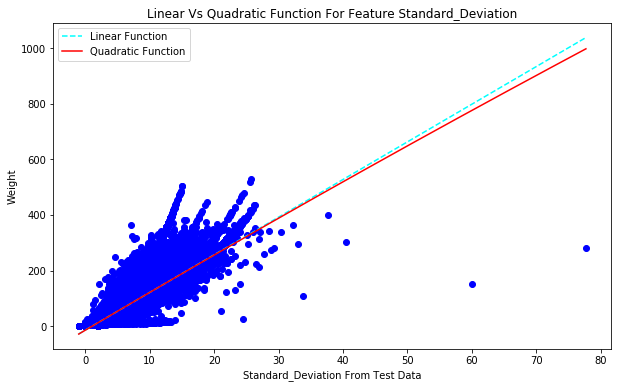

In [57]:
polynomial_plot(X_train.Standard_Deviation, y_train)

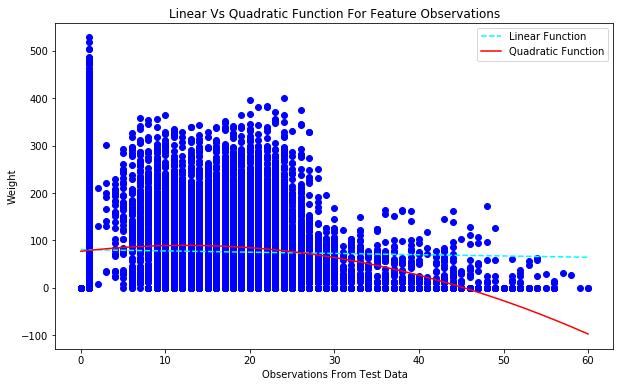

In [58]:
polynomial_plot(X_train.Observations, y_train)

In [59]:
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
poly.fit(X_poly, y_train) 

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                   order='C')

In [60]:
lm = linear_model.LinearRegression() 
lm.fit(X_poly, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
predictions = lm.predict(poly.fit_transform(X_test))
print('r2_score= ', metrics.r2_score(y_test, predictions))

r2_score=  0.9219651899347044


In [49]:
predictedWeight = pd.DataFrame(predictions, columns=['Predicted Number']) # Create new dataframe of column'Predicted Weight'
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,14734,14735,14736,14737,14738,14739,14740,14741,14742,14743
Number of Sunspots,67.000000,12.000000,39.000000,125.000000,153.000000,78.000000,102.000000,0.000000,98.000000,11.000000,...,-1.000000,60.000000,0.000000,73.000000,27.000000,13.000000,171.00000,137.00000,5.000000,0.000000
Predicted Number,77.253199,11.471171,45.543944,136.863883,143.238716,88.937066,112.022543,39.746424,137.084332,0.572414,...,0.571882,65.290797,-11.354871,76.913994,23.486065,17.006696,186.39363,150.66004,2.709198,3.459714


Text(0.5, 1.0, 'Weight From test Data Vs Weight Predicted By Model')

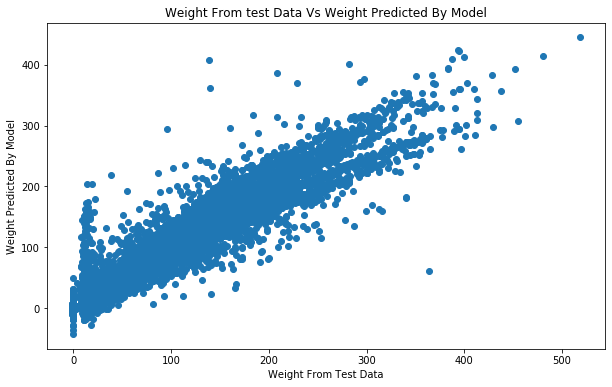

In [16]:
plt.scatter(y_test, predictions)
plt.xlabel('Weight From Test Data')
plt.ylabel('Weight Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Weight From test Data Vs Weight Predicted By Model")

In [63]:
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X_train) 
poly.fit(X_poly, y_train) 
lm = linear_model.LinearRegression() 
lm.fit(X_poly, y_train) 
predictions = lm.predict(poly.fit_transform(X_test))
print('r2_score= ', metrics.r2_score(y_test, predictions))

r2_score=  0.901992883695781


######  EDA

In [50]:
def plot_hist(variable):
    plt.figure(figsize =(9,3))
    plt.hist(data[variable], bins =50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

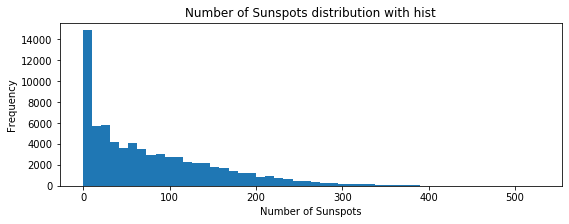

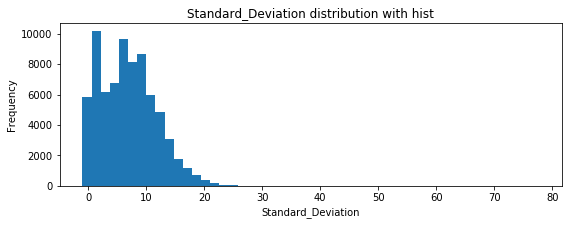

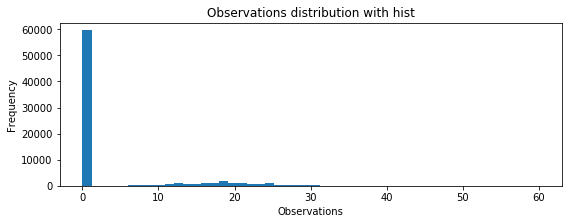

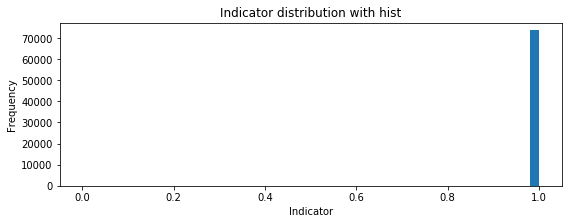

In [53]:
numericVar = ["Number of Sunspots","Standard_Deviation","Observations","Indicator"]
for n in numericVar:
    plot_hist(n)
